### Transforming disease data

This part of the notebook shows the transformations over data related to diseases and symptoms. For each unique symptom, a new column was created in the dataframe. If symptom is typical for a paticular disease, then the column related to that symptom is set to 1, and otherwise to 0.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pickle

In [2]:
df = pd.read_csv("dataset.csv")
symptom_severity = pd.read_csv("Symptom-severity.csv")

In [3]:
df = df.drop_duplicates()

In [4]:
symptoms = np.concatenate((df.Symptom_1.unique(), df.Symptom_2.unique(), df.Symptom_3.unique(), df.Symptom_4.unique(), 
                          df.Symptom_5.unique(), df.Symptom_6.unique(), df.Symptom_7.unique(), df.Symptom_8.unique(), 
                          df.Symptom_9.unique(), df.Symptom_10.unique(), df.Symptom_11.unique(), df.Symptom_12.unique(), 
                          df.Symptom_13.unique(), df.Symptom_14.unique(), df.Symptom_15.unique(), df.Symptom_16.unique(), 
                          df.Symptom_17.unique()))

In [5]:
symptoms_unique = list((set(symptoms)))

In [6]:
len(symptoms_unique)

132

In [7]:
i = 18
for each in symptoms_unique:
    df.insert(i, each, 0)
    i = i + 1

In [8]:
df = df.fillna(0)

In [9]:
for index, row in df.iterrows(): 
    disease_symptoms = [symptom for symptom in list(row)[1:] if symptom != 0]
    for each in disease_symptoms: 
        df.at[index, each] = 1

In [10]:
df = df.drop(columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 
             'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16'
             , 'Symptom_17'])

In [11]:
df = df.loc[:, df.columns.notnull()]
df.columns = df.columns.str.replace(' ', '')
df = df.reindex(sorted(df.columns), axis=1)

In [12]:
list(df.columns)

['Disease',
 'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irr

In [13]:
df

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
403,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
405,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
406,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Description, Precaution and Symptom Severity data

In [14]:
#treba uz predikciju vratiti i taj opis
diseases_description = pd.read_csv("symptom_Description.csv")

In [15]:
#treba to uz predikciju složiti kao neku rečenicu - NLP?
disease_precaution = pd.read_csv("symptom_precaution.csv")

### Building the machine learning model

In [16]:
labels = df.to_numpy()[:, :1]
examples = df.to_numpy()[:, 1:]
list_of_symptoms = list(df.columns)[1:]

with open('list_of_symptoms.pickle', 'wb') as data_file: 
    pickle.dump(list_of_symptoms, data_file)

print(len(labels))
print(len(examples))
print(len(list_of_symptoms))

304
304
131


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, metric='cosine')
X_train, X_test, y_train, y_test = train_test_split(examples, labels.ravel(), test_size=0.2)
knn.fit(X_train, y_train)

In [167]:
symptoms = ['stomach_pain', 'headache'] 
x_test = []

with open('list_of_symptoms.pickle', 'rb') as data_file:
    symptoms_list = pickle.load(data_file)

for each in symptoms_list: 
    if each in symptoms:
        x_test.append(1)
    else: 
        x_test.append(0)

x_test = np.asarray(x_test)            
disease = knn.predict(x_test.reshape(1,-1))[0]
print(disease)

Paralysis (brain hemorrhage)


In [149]:
description = diseases_description.loc[diseases_description['Disease'] == disease, 'Description'].iloc[0]

In [150]:
knn.score(X_test, y_test)

0.9836065573770492

In [160]:
def cross_validation(X_train, y_train, X_test, y_test, model_name, parameter_range=50): 
    train_errors = []
    test_errors = []
    
    parameters = np.linspace(1, parameter_range, parameter_range, dtype=int)
    
    for parameter in parameters: 
        if model_name == 'knn':            
            model = KNeighborsClassifier(n_neighbors=parameter, metric='cosine')
        elif model_name == 'logreg':
            model = LogisticRegression(solver='liblinear', C=1/(parameter*20))
        elif model_name == 'dctree':
            model = DecisionTreeClassifier(splitter='random', max_depth=parameter)
        elif model_name =='svm': 
            model = SVC(C=1/parameter*10, gamma=1-1/(parameter+1))
            
        model.fit(X_train, y_train)
        learning_error = 1 - model.score(X_train, y_train) 
        testing_error = 1 - model.score(X_test, y_test)
        train_errors.append(learning_error)
        test_errors.append(testing_error)
    
    if model_name == 'logreg':
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*20)
    else: 
        best_parameter_value = parameters[np.argmin(test_errors)]
    
    return parameters, best_parameter_value, train_errors, test_errors
    

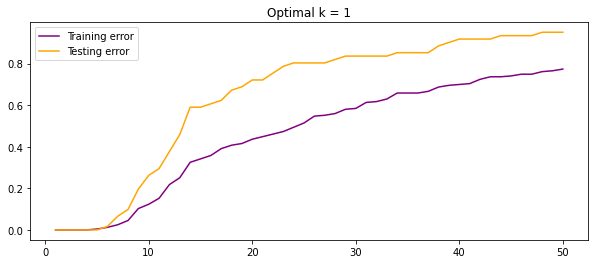

In [152]:
k_range = 20

fig = plt.figure(figsize=(10,4))


k, best_k, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='knn')
plt.title(f"Optimal k = {best_k}")
plt.plot(k, train_errors, c='purple', label='Training error')
plt.plot(k, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [153]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter='random', max_depth=100)

dc_tree = clf.fit(X_train, y_train)
dc_tree.predict(x_test.reshape(1,-1))

array(['Drug Reaction'], dtype=object)

In [154]:
dc_tree.score(X_test, y_test)

0.6721311475409836

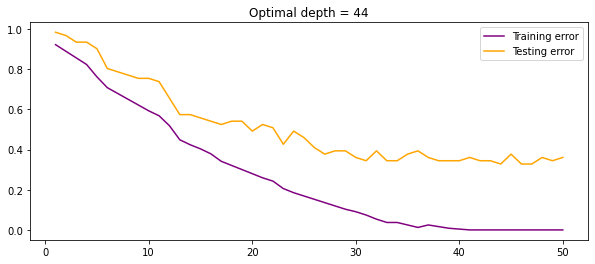

In [132]:
fig = plt.figure(figsize=(10,4))

depth, best_depth, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='dctree')
plt.title(f"Optimal depth = {best_depth}")
plt.plot(depth, train_errors, c='purple', label='Training error')
plt.plot(depth, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [133]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=0.05)

logreg.fit(X_train, y_train)
logreg.predict(x_test.reshape(1,-1))

array(['GERD'], dtype=object)

In [134]:
print(logreg.score(X_test, y_test))

0.9508196721311475


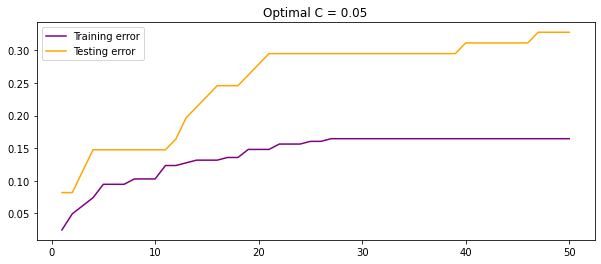

In [158]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='logreg')
plt.title(f"Optimal C = {best_c}")
plt.plot(c, train_errors, c='purple', label='Training error')
plt.plot(c, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [136]:
from sklearn.svm import SVC

svm = SVC(C=0.3)
svm.fit(X_train, y_train)
svm.predict(x_test.reshape(1,-1))

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [137]:
print(svm.score(X_test, y_test))

0.7377049180327869


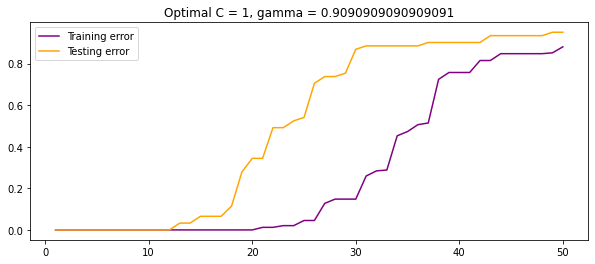

In [162]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='svm')
plt.title(f"Optimal C = {best_c}, gamma = {1-1/(10/best_c + 1)}")
plt.plot(c, train_errors, c='purple', label='Training error')
plt.plot(c, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

[('lr', LogisticRegression(C=0.01, solver='liblinear')), ('knn', KNeighborsClassifier(n_neighbors=15)), ('dctree', DecisionTreeClassifier(max_depth=37, splitter='random'))]
>stacking 0.914 (0.029)
>stacking 0.826 (0.033)
>stacking 0.609 (0.041)


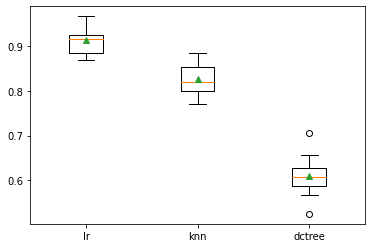

In [172]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
    
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression(solver='liblinear', C=0.01)))
    level0.append(('knn', KNeighborsClassifier(n_neighbors=15)))
    level0.append(('dctree', DecisionTreeClassifier(splitter='random', max_depth=37)))
    #level0.append(('svm', SVC(C=1, gamma=0.91)))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return level0, model

models, model = get_stacking()

print(models)

results, names = list(), list()

for each in models:
    scores = evaluate_model(each[1], examples, labels)
    results.append(scores)
    names.append(each[0])
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [173]:
model.fit(examples, labels.ravel())

with open('fitted_model.pickle', 'wb') as modelFile:
    model_final = pickle.dump(model, modelFile)

with open('fitted_model.pickle', 'rb') as modelFile:
    model_final = pickle.load(modelFile)

predicted = model_final.predict(x_test.reshape(1, -1))[0]
print(f'Predicted Class: {predicted}')

Predicted Class: Cervical spondylosis


In [175]:
print(np.linalg.cond(examples.astype(int)))

1.3988815846922022e+18


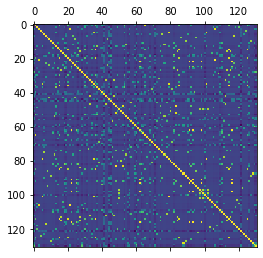

In [177]:
plt.matshow(df.corr())
plt.show()